In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re

In [2]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns


In [3]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')


In [4]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df=df.iloc[:,:2]


In [6]:
df.head()



,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
ham=df[df['v1']=='ham']
ham.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [8]:
spam=df[df['v1']=='spam']
spam.head()


,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [9]:
df['v1'].value_counts()


ham     4825
spam     747
Name: v1, dtype: int64

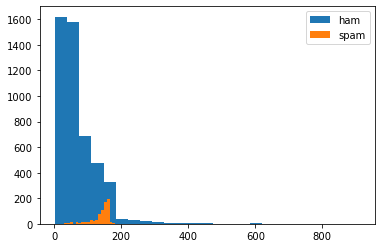

In [10]:
ham_length=ham['v2'].str.len()
spam_length=spam['v2'].str.len()
plt.hist(ham_length,bins=25,label='ham')
plt.hist(spam_length,bins=25,label='spam')
plt.legend()
plt.show()


In [11]:
pip install wordcloud


In [12]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)


In [14]:
comment_words=""
for v in df['v2']:
    v=str(v)#Type cast into string
    tokens=v.split()#Splitting the string
    for  i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
        comment_words+=" ".join(tokens)+" "
        
wordcloud=WordCloud(width=800,height=800,stopwords=stopwords,background_color='white').generate(comment_words)


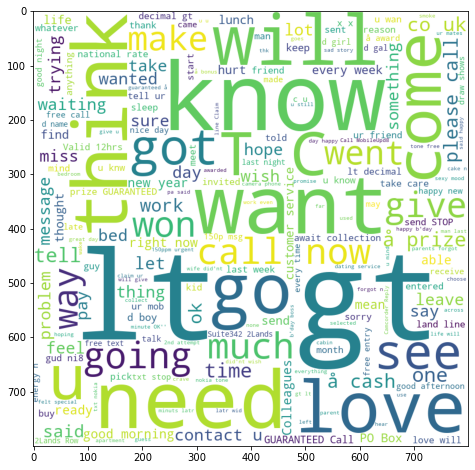

In [15]:
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)

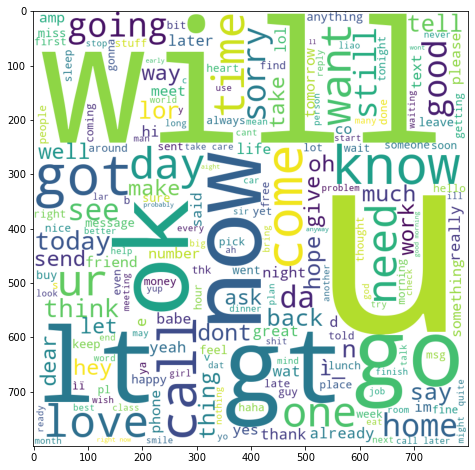

In [16]:
ham_words = ""
for val in ham['v2']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    ham_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(ham_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

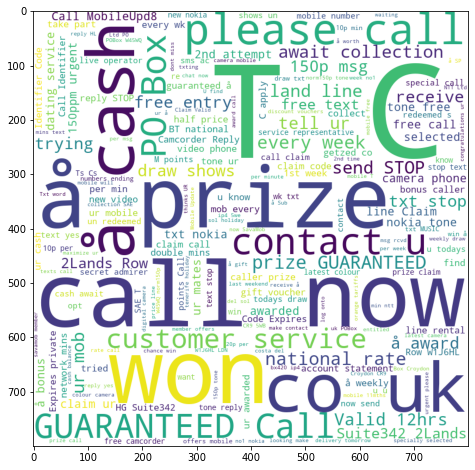

In [17]:
spam_words=""
for v in spam['v2']:
    v=str(v)
    tokens=v.split()
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
        spam_words+=' '.join(tokens)+' '
        
wordcloud=WordCloud(width=800,height=800,background_color='white').generate(spam_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)



In [20]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Naman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Naman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Naman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
text = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['v2'][i])
    review = review.lower()
    review = review.split()
    review =[wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    text.append(review)
    
    

AttributeError: 'set' object has no attribute 'words'